### **Desafio I2A2**

Milena L. dos Santos

O arquivo contendo "read counts" foi obtidos a partir da atividade genética decorrente da transcrição de DNA->RNA de um conjunto de células de diferentes indivíduos.
No total temos por volta de 65 mil genes mapeados de 48 pessoas diferentes.

O que queremos saber é quais pessoas são parentes de quais pessoas, e por extensão, quem não tem parentesco.

Para efeito de análise, podemos compreender que pessoas que são parentes, possuem características genéticas similares.

# **Passo 1 - Entender o Negócio**

O DNA (ácido desoxirribonucleico) é um tipo de ácido nucleico que possui destaque por armazenar a informação genética da grande maioria dos seres vivos. Essa molécula é formada por nucleotídeos e apresenta, geralmente, a forma de uma dupla-hélice.
O DNA é uma molécula extremamente importante para os seres vivos. São funções do DNA:

*   Armazenar e transmitir as informações genéticas.
*   Funcionar como molde para a síntese da molécula de RNA. O DNA, portanto, é fundamental para a síntese de proteínas, uma vez que contém as informações que comandam a síntese de RNA, e o RNA coordena a produção desses polipeptídeos (DNA → RNA → Proteína).

O processo de transcrição é aquele no qual o DNA é usado para a formação de uma molécula de RNA. Nesse processo, o DNA abre-se em um ponto, e uma das fitas é usada como molde para a síntese de RNA. À medida que o RNA é transcrito, o DNA é fechado novamente.

Assim como o DNA, o RNA (ácido ribonucleico) é um ácido nucleico. Essa molécula é essencial na síntese de proteínas, já que ela funciona como uma intermediadora capaz de expressar as informações presentes no DNA. A molécula de RNA é formada a partir da molécula de DNA em um processo chamado de transcrição.

# BioInformática

A bioinformática é uma ciência multidisciplinar que surgiu da necessidade de se compreender as funções biológicas, mais especificamente os genes. 
Essa ciência é responsável por armazenar e relacionar dados biológicos, com o auxílio de métodos computacionais e algoritmos matemáticos. Assim, reconhece padrões que provavelmente seriam impossíveis de serem analisados sem tal ajuda.

Desde o seu surgimento a onde a bioinformática está mais ligada é a área molecular como a análise de sequências genéticas e de DNA, o funcionamento de estruturas e funções de proteínas, regulação e expressão genética.

O sequenciamento é feito com ajuda de maquinas de sequenciamento. Uma vez sequenciados, os dados ficam disponiveis para processamento posterior.


*   O sequenciamento de DNA é o método para determinar a ordem dos nucleotideos em um DNA.
*   O sequenciamento de RNA é o método para encontrar a quantidade de RNA em uma amostra biológica.

O sequenciamento de RNA (RNA-seq) é a aplicação de tecnologias de sequenciamento de próxima geração para moléculas de cDNA. Isso é obtido por transcrição reversa do RNA, a fim de obter informações sobre o conteúdo de RNA de uma amostra. Assim, RNA-seq é o conjunto de procedimentos experimentais que gera moléculas de cDNA derivadas de moléculas de RNA, seguidas pela construção da biblioteca de sequenciamento e sequenciamento profundo massivamente paralelo.

Não existe um pipeline comum para todos os diferentes tipos de RNA-seq. Tanto o desenho experimental quanto os procedimentos de análise serão diferentes dependendo do organismo que está sendo estudado e dos objetivos da pesquisa. 
Como o objetivo principal de muitos estudos biológicos é a comparação da expressão gênica entre amostras, delineamos um possível fluxo de trabalho para detectar a expressão diferencial usando RNA-seq. Na figura a seguir está representado uma visão geral de um experimento de RNA-seq para detectar expressão diferencial (DE).

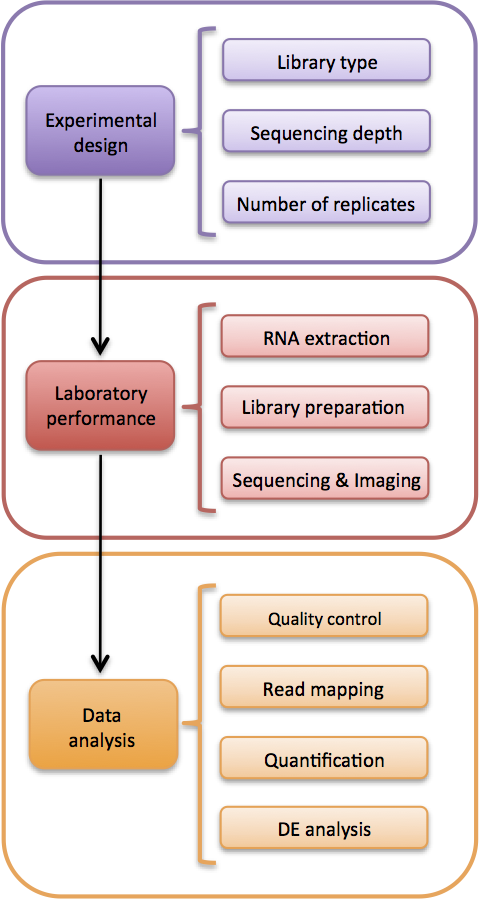

O foco deste trabalho está dentro de Data analysis, após o processo de Quantification, pois nesse processo é realizado a contagem de leitura (read count) de cada gene. Na figura a seguir, apresenta em mais detalhes o processamento de RNA-seq. 

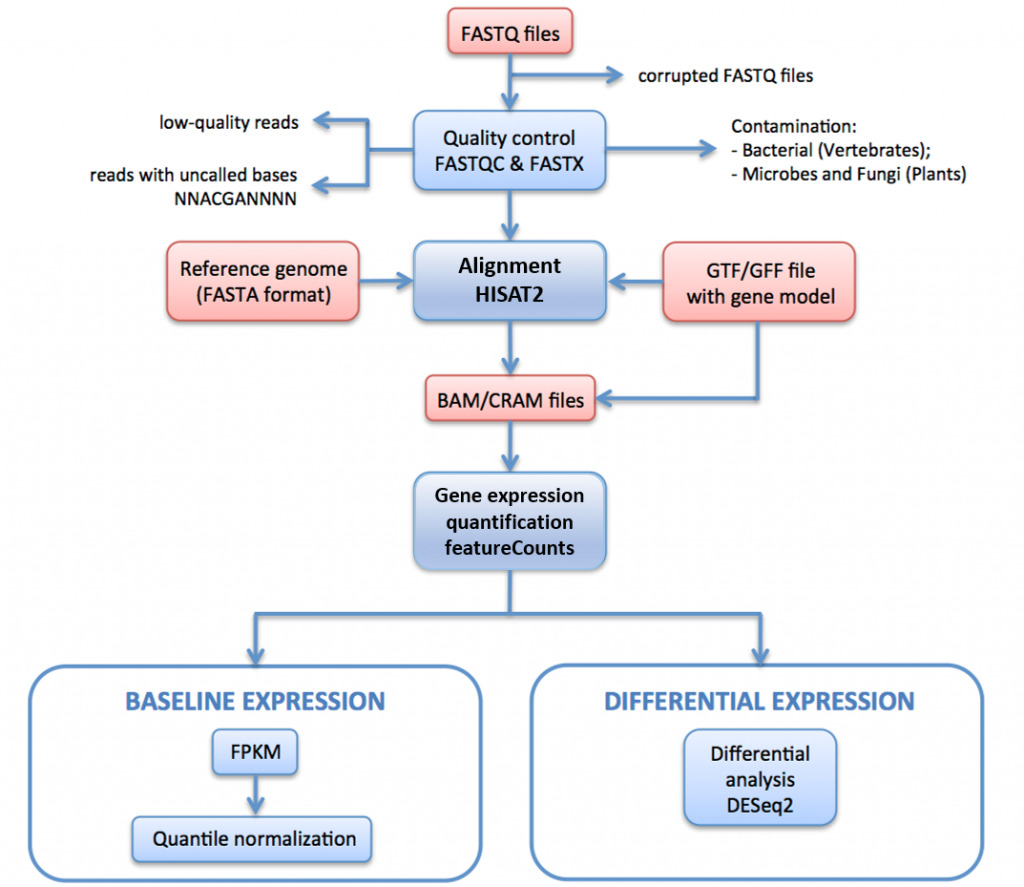

O objetivo é aplicar a normalização nos dados, algoritmos de clusterização com base na semelhança de seu padrão de expressão gênica. Isso pode ser útil para identificar genes que são comumente regulados ou assinaturas biológicas associadas a uma condição específica (por exemplo, uma doença ou uma condição ambiental) 


# **Passo 2 - Entender os dados**



In [ ]:
import pandas as pd

In [ ]:
read_count = pd.read_excel("/content/drive/MyDrive/readcounts.xlsx")

In [ ]:
num_individuos = read_count.shape[1] - 1
num_genes_mapeados = read_count.shape[0]
print("num de individuos " + str(num_individuos) + " " + "e genes mapeados " + str(num_genes_mapeados))
read_count.head(10)

num de individuos 48 e genes mapeados 65215


,Unnamed: 0,H223,H224,H225,H226,H227,H228,H229,H230,H231,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,ENSG00000000003,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,2,0,0,1,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,...,980,932,360,450,484,926,803,630,537,582
3,ENSG00000000457,189,114,110,289,186,148,169,258,145,...,117,286,137,90,105,275,101,56,87,81
4,ENSG00000000460,74,38,55,127,30,17,45,100,33,...,28,157,34,20,15,139,54,25,21,47
5,ENSG00000000938,31895,23361,27944,41846,11929,6856,6756,7668,9315,...,31666,37134,12673,9327,9554,11757,9733,4823,5754,9860
6,ENSG00000000971,2,3,0,6,14,16,15,4,1,...,2,8,8,12,19,5,1,8,14,2
7,ENSG00000001036,763,712,956,1104,136,227,217,905,94,...,773,902,139,223,283,639,111,113,108,599
8,ENSG00000001084,8963,26794,8027,716,745,3770,1260,1480,75,...,14090,1109,1201,5345,1787,2958,278,850,304,475
9,ENSG00000001167,1589,1734,1341,1053,730,663,669,883,873,...,1608,970,600,697,642,1020,838,653,767,586


É possível observar que há um padrão em cada ENS, uma faixa de valores aproximada, apesar de alguns valores fugirem desses valores próximos, sendo um valor muito alto ou muito baixo. 

# **Passo 3 - Preparação dos Dados**

Bibliotecas

In [ ]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Verificação de ausência de dados

In [ ]:
rc_null = read_count.isnull().any().any()
print(rc_null)

False


Transpor os dados

In [ ]:
rc_flip = read_count.transpose()

rc_flip.columns = read_count['Unnamed: 0']
rc_flip = rc_flip.iloc[1: , :]
rc_flip

Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
H223,0,0,1216,189,74,31895,2,763,8963,1589,...,0,0,0,0,0,0,0,0,0,0
H224,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,0,0,0,0,0,0,0,0
H225,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,0,0,0,0,0,0,0,0
H226,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,0,0,0,0,0,0,0,0
H227,0,0,491,186,30,11929,14,136,745,730,...,0,0,0,0,0,0,0,0,0,0
H228,0,0,449,148,17,6856,16,227,3770,663,...,0,0,0,0,0,0,0,0,0,0
H229,0,0,466,169,45,6756,15,217,1260,669,...,0,0,0,0,0,0,0,0,0,0
H230,0,0,727,258,100,7668,4,905,1480,883,...,0,0,0,0,0,0,0,0,0,0
H231,1,0,774,145,33,9315,1,94,75,873,...,0,0,0,0,0,0,0,0,0,0
H232,0,0,576,131,8,3319,7,88,288,678,...,0,0,0,0,0,0,0,0,0,0


Eliminação de valores 0 presentes em toda a coluna

O gene que não teve nenhuma leitura de alinhamento nos 48 individuos se torna inútil para o trabalho.

In [ ]:
rc_flip.index

Index(['H223', 'H224', 'H225', 'H226', 'H227', 'H228', 'H229', 'H230', 'H231',
       'H232', 'H233', 'H234', 'H235', 'H236', 'H237', 'H238', 'H239', 'H240',
       'H241', 'H242', 'H243', 'H244', 'H245', 'H246', 'H247', 'H248', 'H249',
       'H250', 'H251', 'H252', 'H253', 'H254', 'H255', 'H256', 'H257', 'H258',
       'H259', 'H260', 'H261', 'H262', 'H263', 'H264', 'H265', 'H266', 'H267',
       'H268', 'H269', 'H270'],
      dtype='object')

In [ ]:
for column in rc_flip.columns:
  if rc_flip[column].sum() == 0:
    rc_flip = rc_flip.drop(column, axis=1)

rc_flip

Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281891,ENSG00000281892,ENSG00000281896,ENSG00000281899,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281912,ENSG00000281918,ENSG00000281920
H223,0,0,1216,189,74,31895,2,763,8963,1589,...,0,1,19,0,18,0,0,1,0,0
H224,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,18,0,0,0,0,1,0,0
H225,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,11,0,10,0,0,0,0,0
H226,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,23,0,36,0,0,2,0,0
H227,0,0,491,186,30,11929,14,136,745,730,...,0,0,7,1,17,0,0,0,0,0
H228,0,0,449,148,17,6856,16,227,3770,663,...,0,0,11,0,1,0,0,5,0,0
H229,0,0,466,169,45,6756,15,217,1260,669,...,0,0,11,0,6,0,1,3,0,0
H230,0,0,727,258,100,7668,4,905,1480,883,...,0,0,19,0,1,0,0,2,0,0
H231,1,0,774,145,33,9315,1,94,75,873,...,0,0,8,0,28,0,0,1,0,0
H232,0,0,576,131,8,3319,7,88,288,678,...,0,0,2,0,0,0,0,1,0,0


Normalização dos dados

Para a normalização dos dados, foi utilizado a Normalização Quantílica, pois foi observado que essa normalização é utilizado no processo de sequência de RNA.

O uso da normalização quantílica é particularmente popular em projetos de aprendizado de máquina relacionados ao sequenciamento genômico ou à edição de genes. Por exemplo, algumas empresas na vanguarda da ciência genética usam a normalização quantílica para o seqüenciamento de RNA para obter resultados mais sofisticados em termos de edição de genes e outros procedimentos

In [ ]:
!pip install qnorm
import qnorm

In [ ]:
rc_quant = qnorm.quantile_normalize(rc_flip, axis=1)
rc_quant.head(5)

Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281891,ENSG00000281892,ENSG00000281896,ENSG00000281899,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281912,ENSG00000281918,ENSG00000281920
H223,266.791218,345.626356,1012.626908,644.346479,610.333386,724.207529,240.467218,516.787457,644.346479,910.845875,...,359.817857,1027.864616,646.145403,359.817857,644.346479,359.817857,333.065923,345.367325,345.626356,359.817857
H224,266.791218,345.626356,1160.121066,285.804826,358.363042,442.173933,302.008796,442.173933,910.845875,1160.121066,...,359.817857,333.065923,577.899212,359.817857,130.388422,359.817857,333.065923,345.367325,345.626356,359.817857
H225,266.791218,345.626356,773.482385,253.843458,547.95584,577.899212,130.388422,724.207529,577.899212,610.333386,...,359.817857,333.065923,235.216975,359.817857,452.193742,359.817857,333.065923,176.584879,345.626356,359.817857
H226,720.093262,345.626356,547.95584,1160.121066,910.845875,1160.121066,404.826693,835.874882,209.905188,422.67465,...,359.817857,333.065923,804.678634,359.817857,1160.121066,359.817857,333.065923,552.277089,345.626356,359.817857
H227,266.791218,345.626356,149.953579,610.333386,273.556874,303.728614,804.678634,186.782421,217.62937,225.944425,...,359.817857,333.065923,166.85297,1160.121066,594.116299,359.817857,333.065923,176.584879,345.626356,359.817857


Dendrogeama

O dendrograma é um diagrama de árvore que exibe os grupos formados por agrupamento de observações em cada passo e em seus níveis de similaridade. O nível de similaridade é medido ao longo do eixo vertical

In [ ]:
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import scipy.cluster.hierarchy as sch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
c_dist = pdist(rc_quant) # computing the distance
c_link = linkage(rc_quant,  metric='correlation', method='complete')# computing the linkage

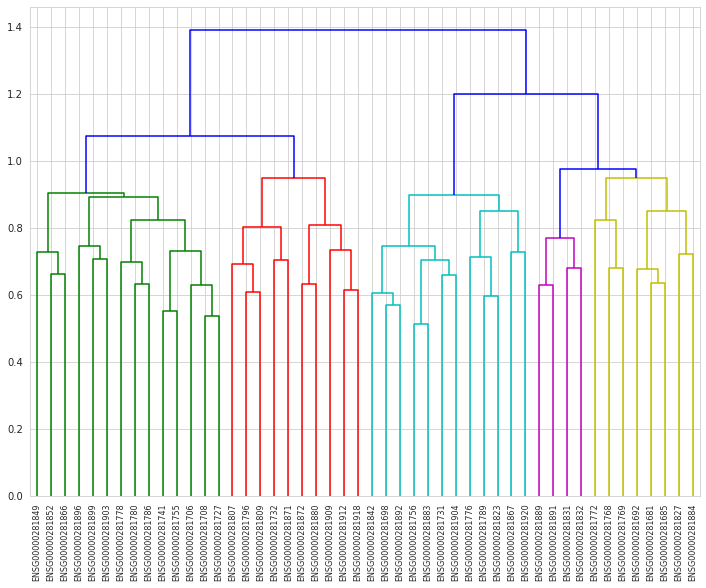

In [ ]:
B=dendrogram(c_link,labels=list(rc_quant.columns))

Este dendrograma apresenta-se uma partição final de 5 agrupamentos. O primeiro agrupamento (extrema esquerda) é composto de treze observações (cor verde da worksheet). O segundo agrupamento, diretamente à direita, é composto de 10 observações (cor vemelho na worksheet). O terceiro agrupamento é composto de 10 observações (as observações na cor verde piscina). O quarto cluster, à direita, é composto de 3 observações (as observações na cor roxa). O quinto cluster, a extrema direita, é composto de 8 observações (cor amarelo).

# **Passo 4 - Modelagem**

PCA

Um dos tipos de redução de dimensionalidade por meio de extração de atributos é o PCA (Análise de Componentes Principais), que vamos aplicar a seguir.

In [ ]:
Xpca = rc_quant.iloc[:,0:].values

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xpca)

In [ ]:
pca.explained_variance_ratio_

array([0.25714159, 0.08347365])

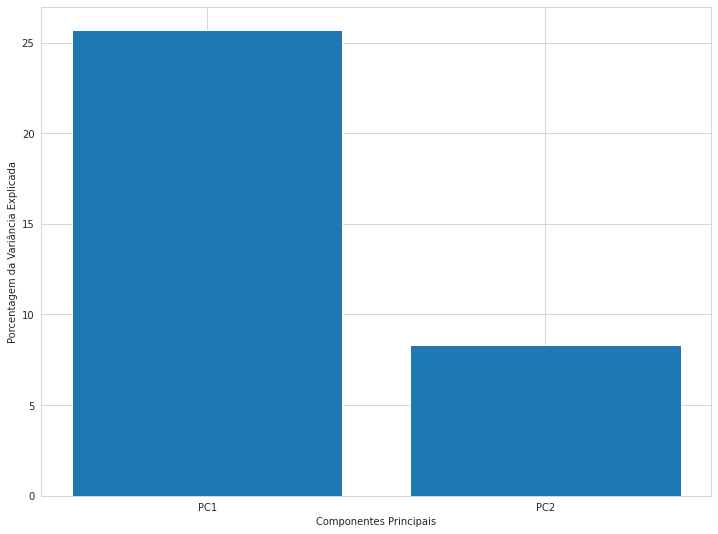

In [ ]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1) # transformando para %

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=['PC1','PC2'])
plt.ylabel('Porcentagem da Variância Explicada')
plt.xlabel('Componentes Principais')
plt.show()

In [ ]:
principalComp = pca.fit_transform(Xpca) 
datapca = pd.DataFrame(principalComp, columns=['PC1','PC2']) # é o novo dataframe 
datapca

,PC1,PC2
0,18135.959220,20066.365669
1,11012.860939,26146.646730
2,6382.045235,19657.783131
3,35083.641372,-16025.948341
4,-22129.931611,-9107.841743
5,-23036.502637,-6342.182209
6,-22383.040967,-7805.443274
7,22861.153864,-15556.223119
8,-17823.293568,-8855.418908
9,-27900.762852,-7238.451184


# K means

O algoritmo k-means procura um número pré-determinado de clusters dentro de um conjunto de dados multidimensional não rotulado. Ele faz isso usando uma concepção simples de como é o agrupamento ideal:

    

*    O "centro do cluster" é a média aritmética de todos os pontos pertencentes ao cluster.
*   Cada ponto está mais próximo de seu próprio centro de cluster do que de outros centros de cluster.


     

In [ ]:
X = datapca.iloc[:,0:].values

Método Elbow

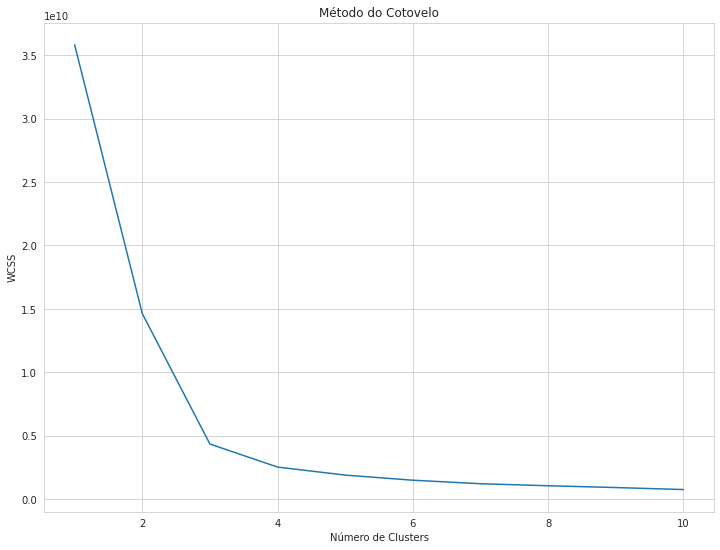

In [ ]:
# método do cotevelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

é evidente que não existe um cotovelo específico para este conjunto de dados.

K means = 3

In [ ]:
kmeans3 = KMeans(n_clusters = 3, init = 'random') 
kmeans3.fit(X)

KMeans(init='random', n_clusters=3)

In [ ]:
kmeans3.cluster_centers_

array([[ 32942.92271556, -12159.368971  ],
       [  7630.35607612,  21548.2310709 ],
       [-20286.63939584,  -4694.43104995]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


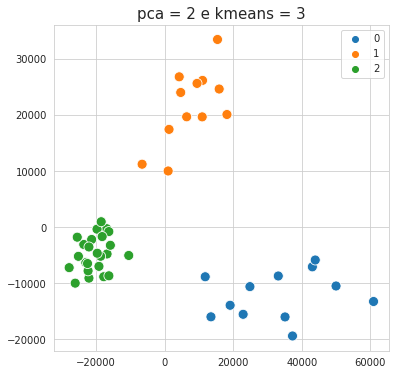

In [ ]:
kmeans_scale = kmeans3
labels_scale = kmeans_scale.labels_
plt.figure(figsize = (6,6))
sns.scatterplot(principalComp[:,0], principalComp[:,1], hue=labels_scale, palette='tab10',s=100).set_title('pca = 2 e kmeans = 3', fontsize=15)
plt.legend()
plt.show()

K means = 5

In [ ]:
kmeans5 = KMeans(n_clusters = 5, init = 'random') 
kmeans5.fit(X)

KMeans(init='random', n_clusters=5)

In [ ]:
kmeans5.cluster_centers_

array([[ 43326.81345788, -11560.40820628],
       [ 18405.47567631, -12997.91404161],
       [-15525.41003779,   -459.75983528],
       [  8925.60346842,  22488.77025677],
       [-22110.50127495,  -6082.88791593]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


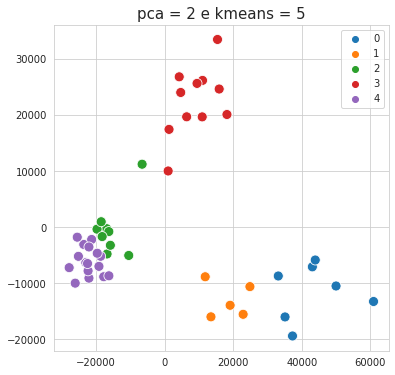

In [ ]:
kmeans_scale = kmeans5
labels_scale = kmeans_scale.labels_
plt.figure(figsize = (6,6))
sns.scatterplot(principalComp[:,0], principalComp[:,1], hue=labels_scale, palette='tab10',s=100).set_title('pca = 2 e kmeans = 5', fontsize=15)
plt.legend()
plt.show()

K means = 8

In [ ]:
kmeans8 = KMeans(n_clusters = 8, init = 'random') 
kmeans8.fit(X)

KMeans(init='random')

In [ ]:
kmeans8.cluster_centers_

array([[-16638.91563761,  -1917.51731799],
       [ -1467.13761254,  12871.18002804],
       [ 14775.68436593, -12937.91279735],
       [-20485.91818616,  -6359.52812285],
       [ 49456.7334367 ,  -9187.92280017],
       [-25684.5840703 ,  -5474.27946071],
       [ 30632.21714843, -14069.39961186],
       [ 10662.85397234,  24440.58141852]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


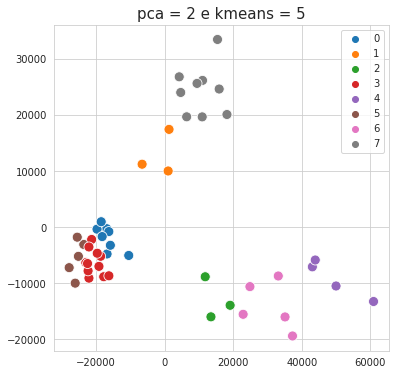

In [ ]:
kmeans_scale = kmeans8
labels_scale = kmeans_scale.labels_
plt.figure(figsize = (6,6))
sns.scatterplot(principalComp[:,0], principalComp[:,1], hue=labels_scale, palette='tab10',s=100).set_title('pca = 2 e kmeans = 5', fontsize=15)
plt.legend()
plt.show()

Ao observar os resultados dos graficos, podemos ver que kmeans = 3 é a melhor opção

# **Passo 5 - Avaliação**

Para a avaliação, utilizamos silhouette score por métrica para verificarmos os resultados

K means = 3

In [ ]:
modelo_v1 = KMeans(n_clusters=3, init='random')
modelo_v1.fit(X)
labels = modelo_v1.labels_

print(f"Silhouette Score (K=3) : {silhouette_score(X, labels, metric='euclidean')}")

Silhouette Score (K=3) : 0.7133829600272854


K means = 5

In [ ]:
modelo_v2 = KMeans(n_clusters=5, init='random')
modelo_v2.fit(X)
labels = modelo_v2.labels_

print(f"Silhouette Score (K=5) : {silhouette_score(X, labels, metric='euclidean')}")

Silhouette Score (K=5) : 0.6083045377912648


K means = 8

In [ ]:
modelo_v3 = KMeans(n_clusters=8, init='random')
modelo_v3.fit(X)
labels = modelo_v3.labels_

print(f"Silhouette Score (K=8) : {silhouette_score(X, labels, metric='euclidean')}")

Silhouette Score (K=8) : 0.4112208208992619


Como podemos perceber, com o aumento de K o valor da métrica se afasta do valor ideal.

Identificando os parentes

In [ ]:
# reconstroi o DataFrame com o atributo FAMILIA

# cria lista com o nome dos atributos
atributos = rc_quant.columns
# cria lista com o nome dos dos índices
indices = rc_quant.index
cluster_final = pd.DataFrame(Xpca, columns= atributos, index=indices)

# cria mais um atributo especificando a família do indivíduo
cluster_final["FAMILIA"] = modelo_v1.labels_


In [ ]:
cluster_final

Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281892,ENSG00000281896,ENSG00000281899,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281912,ENSG00000281918,ENSG00000281920,FAMILIA
H223,266.791218,345.626356,1012.626908,644.346479,610.333386,724.207529,240.467218,516.787457,644.346479,910.845875,...,1027.864616,646.145403,359.817857,644.346479,359.817857,333.065923,345.367325,345.626356,359.817857,0
H224,266.791218,345.626356,1160.121066,285.804826,358.363042,442.173933,302.008796,442.173933,910.845875,1160.121066,...,333.065923,577.899212,359.817857,130.388422,359.817857,333.065923,345.367325,345.626356,359.817857,0
H225,266.791218,345.626356,773.482385,253.843458,547.95584,577.899212,130.388422,724.207529,577.899212,610.333386,...,333.065923,235.216975,359.817857,452.193742,359.817857,333.065923,176.584879,345.626356,359.817857,0
H226,720.093262,345.626356,547.95584,1160.121066,910.845875,1160.121066,404.826693,835.874882,209.905188,422.67465,...,333.065923,804.678634,359.817857,1160.121066,359.817857,333.065923,552.277089,345.626356,359.817857,1
H227,266.791218,345.626356,149.953579,610.333386,273.556874,303.728614,804.678634,186.782421,217.62937,225.944425,...,333.065923,166.85297,1160.121066,594.116299,359.817857,333.065923,176.584879,345.626356,359.817857,2
H228,266.791218,345.626356,121.142755,462.21355,157.005551,143.304624,1012.626908,244.903957,462.21355,170.412753,...,333.065923,235.216975,359.817857,198.035154,359.817857,333.065923,1160.121066,345.626356,359.817857,2
H229,266.791218,345.626356,136.102467,547.95584,403.219974,136.102467,910.845875,225.944425,344.265276,177.11847,...,333.065923,235.216975,359.817857,372.397533,359.817857,910.845875,851.407516,345.626356,359.817857,2
H230,266.791218,345.626356,344.265276,773.482385,773.482385,149.953579,344.193235,683.756345,372.397533,344.265276,...,333.065923,646.145403,359.817857,198.035154,359.817857,333.065923,552.277089,345.626356,359.817857,1
H231,720.093262,345.626356,388.585456,442.173933,323.222168,194.49944,186.16045,121.142755,102.582927,316.49295,...,333.065923,181.950445,359.817857,835.874882,359.817857,333.065923,345.367325,345.626356,359.817857,2
H232,266.791218,345.626356,209.905188,337.108331,107.754006,89.028963,442.173933,112.925086,149.953579,194.49944,...,333.065923,101.512325,359.817857,130.388422,359.817857,333.065923,345.367325,345.626356,359.817857,2


In [ ]:
familias = cluster_final["FAMILIA"].unique()
familias

array([0, 1, 2], dtype=int32)

In [ ]:
for familia in familias:
  individuos = cluster_final[cluster_final["FAMILIA"] == familia]
  print(f"\nFAMILIA {int(familia) + 1} : {individuos.index.values}\n")
  print(f"Total de Parentes encontrados : {len(individuos)}\n")


FAMILIA 1 : ['H223' 'H224' 'H225' 'H235' 'H236' 'H237' 'H247' 'H248' 'H249' 'H259'
 'H260' 'H261']

Total de Parentes encontrados : 12


FAMILIA 2 : ['H226' 'H230' 'H234' 'H238' 'H242' 'H246' 'H250' 'H254' 'H258' 'H262'
 'H266' 'H270']

Total de Parentes encontrados : 12


FAMILIA 3 : ['H227' 'H228' 'H229' 'H231' 'H232' 'H233' 'H239' 'H240' 'H241' 'H243'
 'H244' 'H245' 'H251' 'H252' 'H253' 'H255' 'H256' 'H257' 'H263' 'H264'
 'H265' 'H267' 'H268' 'H269']

Total de Parentes encontrados : 24

